<a href="https://colab.research.google.com/github/skellig-ai/ikeaney.github.io/blob/master/SEM_Classification_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data here:
https://b2share.eudat.eu/records/19cc2afd23e34b92b36a1dfd0113a89f

Paper 1:
https://www.nature.com/articles/s41598-017-13565-z

Paper 2:
https://www.nature.com/articles/sdata2018172

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

# Downloading The Data

Run the cells in this section to download the datasets as .tar, extract the image files and move them into their labeled folders.

In [0]:
!mkdir data

In [3]:
!wget --header="Host: b2share.eudat.eu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://b2share.eudat.eu/records/19cc2afd23e34b92b36a1dfd0113a89f" "https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Biological.tar" -O "Biological.tar" -c

!tar xf Biological.tar -C data/
!rm Biological.tar

--2020-02-03 14:52:58--  https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Biological.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 700318720 (668M) [application/octet-stream]
Saving to: ‘Biological.tar’

Biological.tar      100%[===================>] 667.88M  17.2MB/s    in 40s     

2020-02-03 14:53:40 (16.6 MB/s) - ‘Biological.tar’ saved [700318720/700318720]



In [4]:
!wget --header="Host: b2share.eudat.eu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://b2share.eudat.eu/records/19cc2afd23e34b92b36a1dfd0113a89f" "https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Fibres.tar" -O "Fibres.tar" -c

!tar xf Fibres.tar -C data/
!rm Fibres.tar

--2020-02-03 14:53:45--  https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Fibres.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83684864 (80M) [application/octet-stream]
Saving to: ‘Fibres.tar’

Fibres.tar          100%[===================>]  79.81M  17.3MB/s    in 5.7s    

2020-02-03 14:53:51 (14.0 MB/s) - ‘Fibres.tar’ saved [83684864/83684864]



In [5]:
!wget --header="Host: b2share.eudat.eu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://b2share.eudat.eu/records/19cc2afd23e34b92b36a1dfd0113a89f" "https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Films_Coated_Surface.tar" -O "Films_Coated_Surface.tar" -c

!tar xf Films_Coated_Surface.tar -C data/
!rm Films_Coated_Surface.tar

--2020-02-03 14:53:56--  https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Films_Coated_Surface.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198036480 (189M) [application/octet-stream]
Saving to: ‘Films_Coated_Surface.tar’

Films_Coated_Surfac 100%[===================>] 188.86M  17.1MB/s    in 12s     

2020-02-03 14:54:09 (15.7 MB/s) - ‘Films_Coated_Surface.tar’ saved [198036480/198036480]



In [6]:
!wget --header="Host: b2share.eudat.eu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://b2share.eudat.eu/records/19cc2afd23e34b92b36a1dfd0113a89f" "https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/MEMS_devices_and_electrodes.tar" -O "MEMS_devices_and_electrodes.tar" -c

!tar xf MEMS_devices_and_electrodes.tar -C data/
!rm MEMS_devices_and_electrodes.tar

--2020-02-03 14:54:12--  https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/MEMS_devices_and_electrodes.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3062972928 (2.9G) [application/octet-stream]
Saving to: ‘MEMS_devices_and_electrodes.tar’

MEMS_devices_and_el 100%[===================>]   2.85G  17.5MB/s    in 2m 54s  

2020-02-03 14:57:07 (16.8 MB/s) - ‘MEMS_devices_and_electrodes.tar’ saved [3062972928/3062972928]



In [7]:
!wget --header="Host: b2share.eudat.eu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://b2share.eudat.eu/records/19cc2afd23e34b92b36a1dfd0113a89f" "https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Nanowires.tar" -O "Nanowires.tar" -c

!tar xf Nanowires.tar -C data/
!rm Nanowires.tar

--2020-02-03 14:57:59--  https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Nanowires.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2122462720 (2.0G) [application/octet-stream]
Saving to: ‘Nanowires.tar’

Nanowires.tar       100%[===================>]   1.98G  17.2MB/s    in 2m 0s   

2020-02-03 15:00:00 (16.8 MB/s) - ‘Nanowires.tar’ saved [2122462720/2122462720]



In [8]:
!wget --header="Host: b2share.eudat.eu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://b2share.eudat.eu/records/19cc2afd23e34b92b36a1dfd0113a89f" "https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Particles.tar" -O "Particles.tar" -c

!tar xf Particles.tar -C data/
!rm Particles.tar

--2020-02-03 15:00:29--  https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Particles.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2268709376 (2.1G) [application/octet-stream]
Saving to: ‘Particles.tar’

Particles.tar       100%[===================>]   2.11G  17.0MB/s    in 2m 13s  

2020-02-03 15:02:43 (16.2 MB/s) - ‘Particles.tar’ saved [2268709376/2268709376]



In [9]:
!wget --header="Host: b2share.eudat.eu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://b2share.eudat.eu/records/19cc2afd23e34b92b36a1dfd0113a89f" "https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Patterned_surface.tar" -O "Patterned_surface.tar" -c

!tar xf Patterned_surface.tar -C data/
!rm Patterned_surface.tar

--2020-02-03 15:03:17--  https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Patterned_surface.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2014669824 (1.9G) [application/octet-stream]
Saving to: ‘Patterned_surface.tar’

Patterned_surface.t 100%[===================>]   1.88G  5.04MB/s    in 4m 25s  

2020-02-03 15:07:43 (7.24 MB/s) - ‘Patterned_surface.tar’ saved [2014669824/2014669824]



In [10]:
!wget --header="Host: b2share.eudat.eu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://b2share.eudat.eu/records/19cc2afd23e34b92b36a1dfd0113a89f" "https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Porous_Sponge.tar" -O "Porous_Sponge.tar" -c

!tar xf Porous_Sponge.tar -C data/
!rm Porous_Sponge.tar

--2020-02-03 15:08:04--  https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Porous_Sponge.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118782976 (113M) [application/octet-stream]
Saving to: ‘Porous_Sponge.tar’

Porous_Sponge.tar   100%[===================>] 113.28M  7.55MB/s    in 21s     

2020-02-03 15:08:26 (5.45 MB/s) - ‘Porous_Sponge.tar’ saved [118782976/118782976]



In [11]:
!wget --header="Host: b2share.eudat.eu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://b2share.eudat.eu/records/19cc2afd23e34b92b36a1dfd0113a89f" "https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Powder.tar" -O "Powder.tar" -c

!tar xf Powder.tar -C data/
!rm Powder.tar

--2020-02-03 15:08:30--  https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Powder.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 855590400 (816M) [application/octet-stream]
Saving to: ‘Powder.tar’

Powder.tar          100%[===================>] 815.95M  17.2MB/s    in 60s     

2020-02-03 15:09:31 (13.7 MB/s) - ‘Powder.tar’ saved [855590400/855590400]



In [12]:
!wget --header="Host: b2share.eudat.eu" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.87 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://b2share.eudat.eu/records/19cc2afd23e34b92b36a1dfd0113a89f" "https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Tips.tar" -O "Tips.tar" -c

!tar xf Tips.tar -C data/
!rm Tips.tar

--2020-02-03 15:09:36--  https://b2share.eudat.eu/api/files/5fc88ad5-2f13-483c-8b80-a5862c91dbbb/Tips.tar
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.74
Connecting to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 677133824 (646M) [application/octet-stream]
Saving to: ‘Tips.tar’

Tips.tar            100%[===================>] 645.76M  17.0MB/s    in 49s     

2020-02-03 15:10:26 (13.3 MB/s) - ‘Tips.tar’ saved [677133824/677133824]



# Creating a Dataset

In [0]:
path = Path('data')

In [0]:
size = 64

In [0]:
tfms = get_transforms(flip_vert=True, max_warp=0)

In [0]:
src = (ImageList.from_folder(path)
                .split_by_rand_pct(0.2)
                .label_from_folder())

In [0]:
data = (src
        .transform(tfms, size=size)
        .databunch()
        .normalize(imagenet_stats))

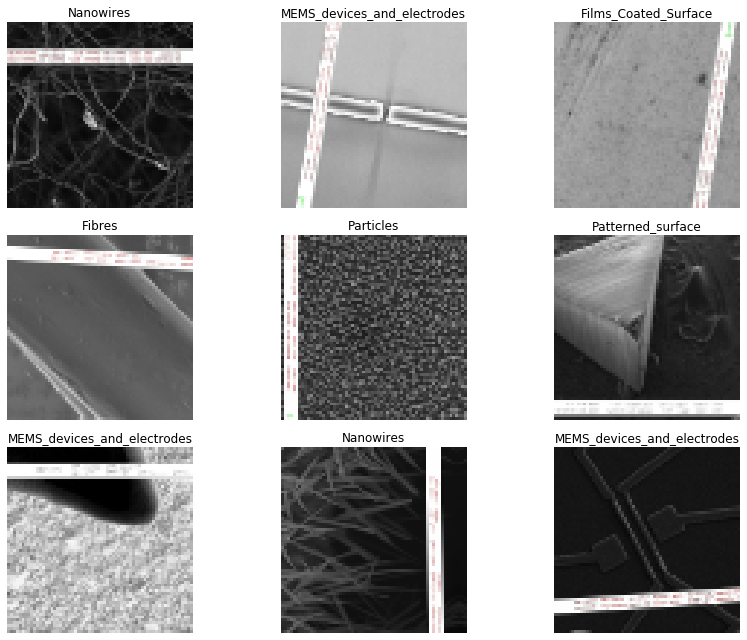

In [18]:
data.show_batch(rows=3, figsize=(12,9))

In [19]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy, error_rate, Recall(), Precision()])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:03<00:00, 25.9MB/s]


epoch,train_loss,valid_loss,accuracy,error_rate,recall,precision,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


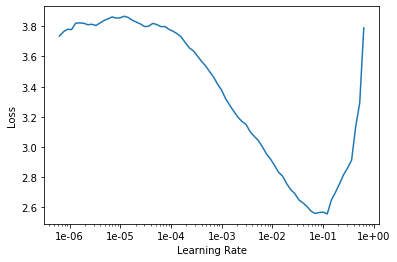

In [20]:
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.fit_one_cycle(10, 5e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,recall,precision,time
0,1.063756,0.690926,0.785195,0.214805,0.646844,0.735830,07:31
1,0.779987,0.585806,0.810498,0.189502,0.703692,0.742788,07:35
2,0.735808,0.583903,0.799192,0.200808,0.586240,0.796214,07:37
3,0.683895,0.570943,0.809152,0.190848,0.691318,0.769412,07:40
4,0.600178,0.549625,0.815074,0.184926,0.692932,0.789782,07:39
5,0.552490,0.483074,0.836608,0.163392,0.717800,0.835184,07:36
6,0.500228,0.414365,0.855451,0.144549,0.762656,0.797739,07:38
7,0.430849,0.369087,0.875370,0.124630,0.773794,0.855004,07:39
8,0.376345,0.348041,0.880485,0.119515,0.797413,0.835203,07:41
9,0.376198,0.346004,0.879139,0.120861,0.810138,0.824521,07:38


/usr/local/lib/python3.6/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


epoch,train_loss,valid_loss,accuracy,error_rate,recall,precision,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


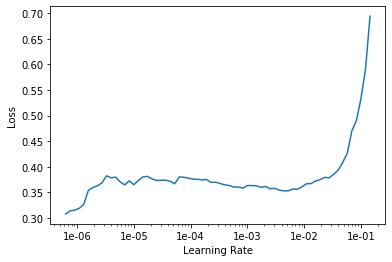

In [23]:
learn.unfreeze
learn.lr_find()
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,recall,precision,time
0,0.382022,0.350059,0.882369,0.117631,0.791650,0.852958,07:33
1,0.396068,0.348157,0.883446,0.116555,0.803376,0.860515,07:35
2,0.389251,0.338250,0.882907,0.117093,0.819925,0.835051,07:41
3,0.353774,0.329333,0.886676,0.113324,0.819156,0.851873,07:40
4,0.327892,0.327636,0.886945,0.113055,0.806346,0.859412,07:41


In [0]:
learn.save('64sz')

# Increasing the image size to 128 pixels

In [0]:
size = 128

In [27]:
data = (src
        .transform(tfms, size=size)
        .databunch()
        .normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 128, 128])

epoch,train_loss,valid_loss,accuracy,error_rate,recall,precision,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


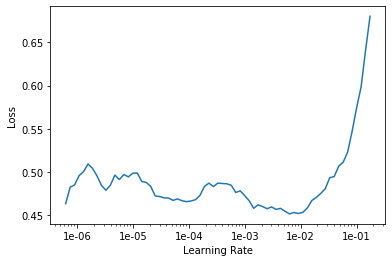

In [28]:
learn.freeze
learn.lr_find()
learn.recorder.plot()

In [29]:
learn.fit_one_cycle(10,1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,recall,precision,time
0,0.361228,0.298726,0.896904,0.103096,0.844084,0.881204,08:41
1,0.337806,0.276478,0.902288,0.097712,0.848017,0.873920,08:43
2,0.324325,0.259110,0.910902,0.089098,0.859995,0.902541,08:43
3,0.297886,0.259034,0.913863,0.086137,0.858765,0.913425,08:44
4,0.278188,0.235883,0.920861,0.079139,0.864931,0.902423,08:44
5,0.249423,0.229312,0.921938,0.078062,0.880406,0.899453,08:47
6,0.233994,0.222959,0.921938,0.078062,0.893786,0.904498,08:49
7,0.221344,0.218571,0.926245,0.073755,0.886112,0.909038,08:46
8,0.206418,0.218575,0.925168,0.074832,0.889176,0.911254,08:50
9,0.202660,0.216770,0.924899,0.075101,0.892791,0.909006,09:07


epoch,train_loss,valid_loss,accuracy,error_rate,recall,precision,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


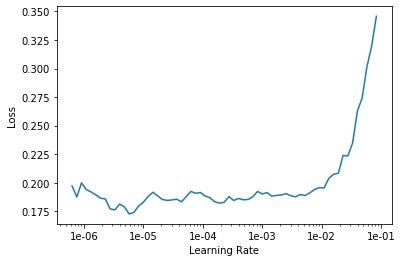

In [30]:
learn.unfreeze
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(5,1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,recall,precision,time
0,0.227495,0.222187,0.922207,0.077793,0.884253,0.909252,09:05
1,0.229381,0.230591,0.919246,0.080754,0.865774,0.901927,09:02
2,0.228176,0.219031,0.929206,0.070794,0.888554,0.920359,09:04
3,0.206521,0.211796,0.928129,0.071871,0.894573,0.917302,09:02
4,0.182447,0.206900,0.928937,0.071063,0.893766,0.920509,09:08


In [0]:
learn.save('128sz')

# Increasing the image size to 224 pixels

In [0]:
size = 224

In [34]:
data = (src
        .transform(tfms, size=size)
        .databunch()
        .normalize(imagenet_stats))

learn.data = data
data.train_ds[0][0].shape

torch.Size([3, 224, 224])

epoch,train_loss,valid_loss,accuracy,error_rate,recall,precision,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


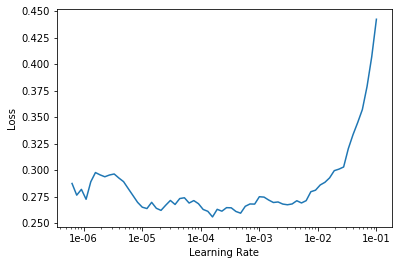

In [35]:
learn.freeze
learn.lr_find()
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(10,5e-4)

epoch,train_loss,valid_loss,accuracy,error_rate,recall,precision,time
0,0.275738,0.235986,0.922746,0.077254,0.886405,0.918146,12:19
1,0.245934,0.210333,0.928398,0.071602,0.891616,0.920659,12:31
2,0.223977,0.205894,0.930283,0.069717,0.886469,0.929831,12:36
3,0.199656,0.208519,0.932167,0.067833,0.901303,0.924534,12:16
4,0.204565,0.196694,0.936205,0.063795,0.904213,0.930101,12:16
5,0.182336,0.188000,0.939166,0.060834,0.908101,0.935964,12:38
6,0.168189,0.183197,0.940242,0.059758,0.911268,0.932325,12:51
7,0.153581,0.180107,0.940242,0.059758,0.905003,0.934357,12:57
8,0.145540,0.178653,0.941050,0.058950,0.912015,0.935386,12:50
9,0.144444,0.178669,0.941319,0.058681,0.915312,0.939861,12:38


epoch,train_loss,valid_loss,accuracy,error_rate,recall,precision,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


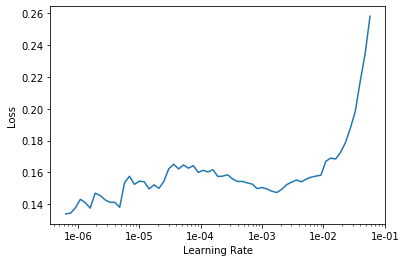

In [37]:
learn.unfreeze
learn.lr_find()
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(5,1e-3)

epoch,train_loss,valid_loss,accuracy,error_rate,recall,precision,time
0,0.161116,0.197813,0.936205,0.063795,0.898187,0.930075,12:16
1,0.178131,0.199773,0.936474,0.063526,0.906569,0.932719,12:19
2,0.160498,0.189080,0.940781,0.059219,0.904749,0.939237,12:30
3,0.145075,0.167107,0.945087,0.054913,0.917173,0.939743,12:41
4,0.127160,0.166720,0.945357,0.054643,0.917709,0.941601,12:33


In [0]:
learn.save('224sz')